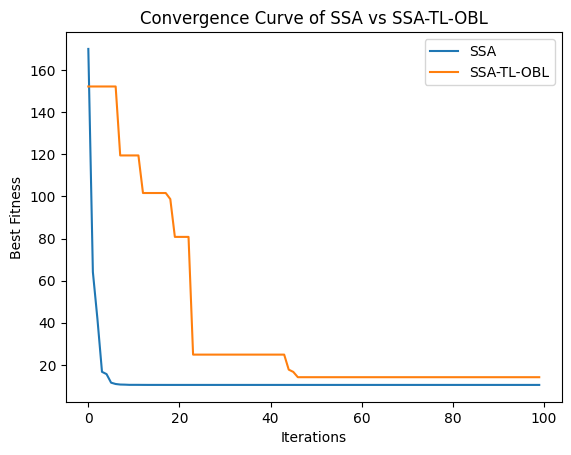

+-------------+----------------+----------------+-----------+
| Algorithm   |   Mean Fitness |   Best Fitness |   Std Dev |
+=============+================+================+===========+
| SSA         |        13.0755 |        10.4986 |   16.9383 |
+-------------+----------------+----------------+-----------+
| SSA-TL-OBL  |        40.154  |        14.1641 |   44.083  |
+-------------+----------------+----------------+-----------+


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from tabulate import tabulate

def objective_function(x):
    return np.sum(x**2)

def levy_flight(beta, dim):
    sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) / (gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
    u = np.random.normal(0, sigma, dim)
    v = np.random.normal(0, 1, dim)
    step = u / np.abs(v)**(1 / beta)
    return step

def opposition_based_learning(pop, lb, ub):
    return lb + ub - pop

def SSA(pop_size, dim, max_iter, lb, ub):
    salp_pos = np.random.uniform(lb, ub, (pop_size, dim))
    best_fitness = np.inf
    best_pos = None
    fitness_curve = []
    
    for t in range(max_iter):
        salp_pos = np.clip(salp_pos, lb, ub)
        fitness = np.array([objective_function(ind) for ind in salp_pos])
        min_idx = np.argmin(fitness)
        if fitness[min_idx] < best_fitness:
            best_fitness = fitness[min_idx]
            best_pos = salp_pos[min_idx].copy()
        
        for i in range(pop_size):
            salp_pos[i] = salp_pos[i] + np.random.uniform(0, 1, dim) * (best_pos - salp_pos[i])
        
        fitness_curve.append(best_fitness)
    
    return best_fitness, fitness_curve

def SSA_TL_OBL(pop_size, dim, max_iter, lb, ub, beta1=1.5, beta2=1.1):
    salp_pos = np.random.uniform(lb, ub, (pop_size, dim))
    opposite_salp = opposition_based_learning(salp_pos, lb, ub)
    combined_pop = np.vstack((salp_pos, opposite_salp))
    fitness = np.array([objective_function(ind) for ind in combined_pop])
    sorted_indices = np.argsort(fitness)
    salp_pos = combined_pop[sorted_indices[:pop_size]]
    best_fitness = np.min(fitness)
    best_pos = salp_pos[0].copy()
    fitness_curve = []
    
    for t in range(max_iter):
        salp_pos = np.clip(salp_pos, lb, ub)
        fitness = np.array([objective_function(ind) for ind in salp_pos])
        min_idx = np.argmin(fitness)
        if fitness[min_idx] < best_fitness:
            best_fitness = fitness[min_idx]
            best_pos = salp_pos[min_idx].copy()
        
        for i in range(pop_size):
            step = levy_flight(beta1 if t < max_iter // 2 else beta2, dim)
            salp_pos[i] = salp_pos[i] + step * (best_pos - salp_pos[i])
        
        fitness_curve.append(best_fitness)
    
    return best_fitness, fitness_curve

pop_size = 30
max_iter = 100
dim = 10
lb, ub = -10, 10

ssa_best, ssa_curve = SSA(pop_size, dim, max_iter, lb, ub)
ssa_tl_obl_best, ssa_tl_obl_curve = SSA_TL_OBL(pop_size, dim, max_iter, lb, ub)

plt.plot(ssa_curve, label="SSA")
plt.plot(ssa_tl_obl_curve, label="SSA-TL-OBL")
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")
plt.title("Convergence Curve of SSA vs SSA-TL-OBL")
plt.legend()
plt.show()

data = [
    ["SSA", np.mean(ssa_curve), ssa_best, np.std(ssa_curve)],
    ["SSA-TL-OBL", np.mean(ssa_tl_obl_curve), ssa_tl_obl_best, np.std(ssa_tl_obl_curve)]
]
headers = ["Algorithm", "Mean Fitness", "Best Fitness", "Std Dev"]
print(tabulate(data, headers, tablefmt="grid"))


In [6]:
############################################################################

# Created by: Prof. Valdecy Pereira, D.Sc.
# UFF - Universidade Federal Fluminense (Brazil)
# email:  valdecy.pereira@gmail.com
# Course: Metaheuristics
# Lesson: Salp Swarm Algorithm

# Citation: 
# PEREIRA, V. (2018). Project: Metaheuristic-Salp_Swarm_Algorithm, File: Python-MH-Salp Swarm Algorithm.py, GitHub repository: <https://github.com/Valdecy/Metaheuristic-Salp_Swarm_Algorithm>

############################################################################

# Required Libraries
import numpy  as np
import math
import random
import os

# Function
def target_function():
    return

# Function: Initialize Variables
def initial_position(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], target_function = target_function):
    position = np.zeros((swarm_size, len(min_values) + 1))
    for i in range(0, swarm_size):
        for j in range(0, len(min_values)):
             position[i,j] = random.uniform(min_values[j], max_values[j])
        position[i,-1] = target_function(position[i,0:position.shape[1]-1])
    return position

# Function: Initialize Food Position
def food_position(dimension = 2, target_function = target_function):
    food = np.zeros((1, dimension+1))
    for j in range(0, dimension):
        food[0,j] = 0.0
    food[0,-1] = target_function(food[0,0:food.shape[1]-1])
    return food

# Function: Updtade Food Position by Fitness
def update_food(position, food):
    for i in range(0, position.shape[0]):
        if (food[0,-1] > position[i,-1]):
            for j in range(0, position.shape[1]):
                food[0,j] = position[i,j]
    return food

# Function: Updtade Position
def update_position(position, food, c1 = 1, min_values = [-5,-5], max_values = [5,5], target_function = target_function):
    for i in range(0, position.shape[0]):
        if (i <= position.shape[0]/2):
            for j in range (0, len(min_values)):
                c2 = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
                c3 = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
                if (c3 >= 0.5): #c3 < 0.5
                    position[i,j] = np.clip((food[0,j] + c1*((max_values[j] - min_values[j])*c2 + min_values[j])), min_values[j],max_values[j])
                else:
                    position[i,j] = np.clip((food[0,j] - c1*((max_values[j] - min_values[j])*c2 + min_values[j])), min_values[j],max_values[j])                       
        elif (i > position.shape[0]/2 and i < position.shape[0] + 1):
            for j in range (0, len(min_values)):
                position[i,j] = np.clip(((position[i - 1,j] + position[i,j])/2), min_values[j],max_values[j])             
        position[i,-1] = target_function(position[i,0:position.shape[1]-1])         
    return position

# SSA Function
def salp_swarm_algorithm(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], iterations = 50, target_function = target_function):    
    count    = 0
    position = initial_position(swarm_size = swarm_size, min_values = min_values, max_values = max_values, target_function = target_function)
    food     = food_position(dimension = len(min_values), target_function = target_function)
    while (count <= iterations):     
        print("Iteration = ", count, " f(x) = ", food[0,-1]) 
        c1       = 2*math.exp(-(4*(count/iterations))**2)
        food     = update_food(position, food)        
        position = update_position(position, food, c1 = c1, min_values = min_values, max_values = max_values, target_function = target_function)  
        count    = count + 1 
    print(food)    
    return food

######################## Part 1 - Usage ####################################

# Function to be Minimized (Six Hump Camel Back). Solution ->  f(x1, x2) = -1.0316; x1 = 0.0898, x2 = -0.7126 or x1 = -0.0898, x2 = 0.7126
def six_hump_camel_back(variables_values = [0, 0]):
    func_value = 4*variables_values[0]**2 - 2.1*variables_values[0]**4 + (1/3)*variables_values[0]**6 + variables_values[0]*variables_values[1] - 4*variables_values[1]**2 + 4*variables_values[1]**4
    return func_value

ssa = salp_swarm_algorithm(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], iterations = 100, target_function = six_hump_camel_back)

# Function to be Minimized (Rosenbrocks Valley). Solution ->  f(x) = 0; xi = 1
def rosenbrocks_valley(variables_values = [0,0]):
    func_value = 0
    last_x = variables_values[0]
    for i in range(1, len(variables_values)):
        func_value = func_value + (100 * math.pow((variables_values[i] - math.pow(last_x, 2)), 2)) + math.pow(1 - last_x, 2)
    return func_value

ssa = salp_swarm_algorithm(swarm_size = 15, min_values = [-5,-5], max_values = [5,5], iterations = 200, target_function = rosenbrocks_valley)

Iteration =  0  f(x) =  0.0
Iteration =  1  f(x) =  0.0
Iteration =  2  f(x) =  0.0
Iteration =  3  f(x) =  0.0
Iteration =  4  f(x) =  0.0
Iteration =  5  f(x) =  0.0
Iteration =  6  f(x) =  0.0
Iteration =  7  f(x) =  0.0
Iteration =  8  f(x) =  0.0
Iteration =  9  f(x) =  0.0
Iteration =  10  f(x) =  0.0
Iteration =  11  f(x) =  -0.037406777269625144
Iteration =  12  f(x) =  -0.037406777269625144
Iteration =  13  f(x) =  -0.037406777269625144
Iteration =  14  f(x) =  -0.037406777269625144
Iteration =  15  f(x) =  -0.037406777269625144
Iteration =  16  f(x) =  -0.5958753913406161
Iteration =  17  f(x) =  -0.5958753913406161
Iteration =  18  f(x) =  -0.5958753913406161
Iteration =  19  f(x) =  -0.5958753913406161
Iteration =  20  f(x) =  -0.5958753913406161
Iteration =  21  f(x) =  -0.5958753913406161
Iteration =  22  f(x) =  -0.5958753913406161
Iteration =  23  f(x) =  -0.5958753913406161
Iteration =  24  f(x) =  -0.5958753913406161
Iteration =  25  f(x) =  -0.914635472693349
Iterati

In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import math
import random
import warnings
warnings.filterwarnings('ignore')

class SSACD:
    def __init__(self, graph, num_salps=50, max_iter=100, 
                 levy_alpha1=1.5, levy_alpha2=1.1, c1=2.0):
        """
        Salp Swarm Algorithm for Community Detection with:
        - Two-Stage Levy Flight
        - Opposition-Based Learning
        
        Parameters:
        - graph: NetworkX graph
        - num_salps: Number of salps in population
        - max_iter: Maximum iterations
        - levy_alpha1: Levy exponent for exploration phase
        - levy_alpha2: Levy exponent for exploitation phase
        - c1: Adaptive parameter for leader movement
        """
        self.graph = graph
        self.num_nodes = graph.number_of_nodes()
        self.num_salps = num_salps
        self.max_iter = max_iter
        self.levy_alpha1 = levy_alpha1
        self.levy_alpha2 = levy_alpha2
        self.c1 = c1
        
        # Initialize population and opposition population
        self.population = self.initialize_population()
        self.opposition_pop = self.generate_opposition(self.population)
        self.combined_pop = np.concatenate((self.population, self.opposition_pop))
        
        # Fitness evaluation
        self.fitness = np.zeros(2 * num_salps)
        self.best_solution = None
        self.best_fitness = -np.inf
        self.fitness_history = []
        
    def initialize_population(self):
        """Initialize salp positions with random community assignments"""
        population = []
        for _ in range(self.num_salps):
            # Randomly assign nodes to communities (2-10 communities)
            num_comms = random.randint(2, min(10, self.num_nodes))
            comm_assignments = np.random.randint(0, num_comms, size=self.num_nodes)
            
            # Convert to matrix representation
            matrix = np.zeros((self.num_nodes, num_comms))
            for node, comm in enumerate(comm_assignments):
                matrix[node, comm] = 1
                
            population.append(matrix)
        return population
    
    def generate_opposition(self, population):
        """Generate opposition solutions using Opposition-Based Learning"""
        opposition = []
        for matrix in population:
            # For each solution, create its opposite in community space
            opp_matrix = np.zeros_like(matrix)
            num_comms = matrix.shape[1]
            
            # For each node, assign to opposite community (based on least similar)
            for node in range(matrix.shape[0]):
                current_comm = np.argmax(matrix[node])
                # Find community with least overlap with current neighbors
                neighbors = list(self.graph.neighbors(node))
                if neighbors:
                    neighbor_comms = [np.argmax(matrix[n]) for n in neighbors]
                    comm_counts = [neighbor_comms.count(c) for c in range(num_comms)]
                    opposite_comm = np.argmin(comm_counts)
                else:
                    opposite_comm = (current_comm + 1) % num_comms
                opp_matrix[node, opposite_comm] = 1
                
            opposition.append(opp_matrix)
        return opposition
    
    def modularity(self, partition_matrix):
        """Calculate modularity (Q) for a partition matrix"""
        m = self.graph.number_of_edges()
        if m == 0:
            return 0
            
        A = nx.adjacency_matrix(self.graph).todense()
        k = np.array([d for n, d in self.graph.degree()])
        B = A - np.outer(k, k) / (2 * m)
        
        communities = np.argmax(partition_matrix, axis=1)
        
        Q = 0
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                if communities[i] == communities[j]:
                    Q += B[i, j]
        
        return Q / (2 * m)
    
    def evaluate_fitness(self):
        """Evaluate fitness of all solutions"""
        for i, matrix in enumerate(self.combined_pop):
            self.fitness[i] = self.modularity(matrix)
            
            # Update best solution
            if self.fitness[i] > self.best_fitness:
                self.best_fitness = self.fitness[i]
                self.best_solution = matrix.copy()
                
        # Keep top half of combined population
        sorted_indices = np.argsort(self.fitness)[::-1]
        self.population = [self.combined_pop[i] for i in sorted_indices[:self.num_salps]]
        self.fitness_history.append(self.best_fitness)
    
    def levy_flight(self, alpha):
        """Generate step from Levy distribution"""
        # Mantegna's algorithm for Levy flight
        beta = 1.0  # Scale factor
        sigma_u = (math.gamma(1 + alpha) * math.sin(math.pi * alpha / 2) / 
                  (math.gamma((1 + alpha) / 2) * alpha * 2 ** ((alpha - 1) / 2))) ** (1 / alpha)
        sigma_v = 1
        
        u = np.random.normal(0, sigma_u)
        v = np.random.normal(0, sigma_v)
        step = u / (abs(v) ** (1 / alpha))
        
        return beta * step
    
    def update_positions(self, iteration):
        """Update salp positions using two-stage Levy flight"""
        c1 = self.c1 * math.exp(-(4 * iteration / self.max_iter) ** 2)
        
        # Determine current stage (exploration or exploitation)
        if iteration < 0.5 * self.max_iter:
            alpha = self.levy_alpha1  # Exploration phase
        else:
            alpha = self.levy_alpha2  # Exploitation phase
        
        new_population = []
        for i in range(self.num_salps):
            if i == 0:  # Leader salp
                # Update based on best solution and Levy flight
                step = self.levy_flight(alpha)
                leader_matrix = self.best_solution.copy()
                
                # Perturb community assignments
                for node in range(self.num_nodes):
                    if random.random() < 0.1:  # 10% chance to change
                        current_comm = np.argmax(leader_matrix[node])
                        new_comm = (current_comm + int(step)) % leader_matrix.shape[1]
                        leader_matrix[node] = 0
                        leader_matrix[node, new_comm] = 1
                
                new_population.append(leader_matrix)
            else:  # Follower salps
                # Update based on previous salp and Levy flight
                step = self.levy_flight(alpha)
                prev_matrix = self.population[i-1].copy()
                curr_matrix = self.population[i].copy()
                
                # Blend with previous salp's position
                new_matrix = np.zeros_like(curr_matrix)
                for node in range(self.num_nodes):
                    if random.random() < abs(step):  # Probability based on Levy step
                        # Follow previous salp
                        new_matrix[node] = prev_matrix[node]
                    else:
                        # Stay with current position
                        new_matrix[node] = curr_matrix[node]
                
                # Ensure each node belongs to exactly one community
                for node in range(self.num_nodes):
                    if np.sum(new_matrix[node]) != 1:
                        comm = np.argmax(new_matrix[node])
                        new_matrix[node] = 0
                        new_matrix[node, comm] = 1
                
                new_population.append(new_matrix)
        
        self.population = new_population
    
    def run(self):
        """Execute the optimization process"""
        self.evaluate_fitness()  # Initial evaluation
        
        for iter in range(self.max_iter):
            self.update_positions(iter)
            self.opposition_pop = self.generate_opposition(self.population)
            self.combined_pop = np.concatenate((self.population, self.opposition_pop))
            self.evaluate_fitness()
            
            print(f"Iteration {iter+1}/{self.max_iter}, Best Q: {self.best_fitness:.4f}")
        
        return self.best_solution, self.best_fitness
    
    def get_communities(self, solution_matrix):
        """Convert solution matrix to community labels"""
        return np.argmax(solution_matrix, axis=1)
    
    def plot_fitness(self):
        """Plot fitness (modularity) over iterations"""
        plt.figure(figsize=(10, 5))
        plt.plot(self.fitness_history, 'b-', linewidth=2)
        plt.title('Fitness (Modularity) Over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Modularity (Q)')
        plt.grid(True)
        plt.show()

# Example usage with Zachary's Karate Club
if __name__ == "__main__":
    # Load dataset
    G = nx.karate_club_graph()
    
    # Run algorithm
    ssacd = SSACD(G, num_salps=30, max_iter=50)
    best_solution, best_fitness = ssacd.run()
    
    # Get communities
    communities = ssacd.get_communities(best_solution)
    print("Detected communities:", communities)
    print("Modularity:", best_fitness)
    
    # Plot fitness progression
    ssacd.plot_fitness()
    
    # Visualize the network with detected communities
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_size=200, 
                          cmap=plt.cm.rainbow, node_color=communities)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos)
    plt.title("Network with Detected Communities")
    plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (30, 34) + inhomogeneous part.